In [40]:
!pip install Pillow

In [41]:
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

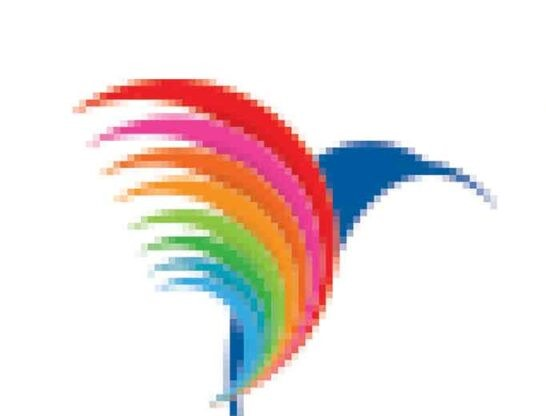

In [42]:
image_path = r"C:\Users\HP\Downloads\raster image.tiff"
image = Image.open(image_path)

image.show()
display(image)

In [43]:
zoom_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description="Zoom:")
pan_x_slider = widgets.FloatSlider(value=0, min=-50, max=50, step=1, description="Pan X:")
pan_y_slider = widgets.FloatSlider(value=0, min=-50, max=50, step=1, description="Pan Y:")

In [49]:
def update_image(zoom, pan_x, pan_y):
    zoomed_image = image.resize((int(image.width * zoom), int(image.height * zoom)))
    shifted_image = Image.new("RGB", image.size)
    shifted_image.paste(zoomed_image, (int(pan_x), int(pan_y)))

    display(shifted_image)

widgets.interactive(update_image, zoom=zoom_slider, pan_x=pan_x_slider, pan_y=pan_y_slider)

interactive(children=(FloatSlider(value=1.0, description='Zoom:', max=2.0, min=0.1), FloatSlider(value=0.0, de…

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

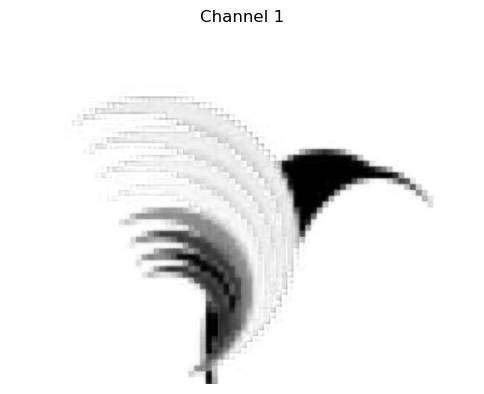

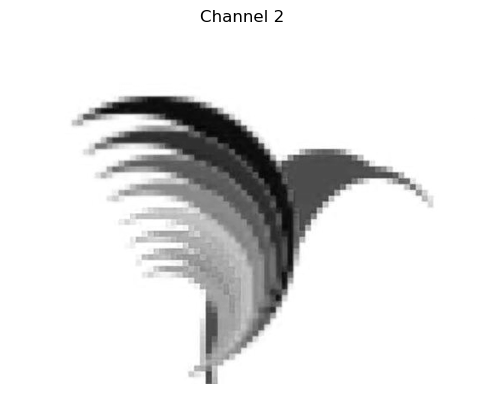

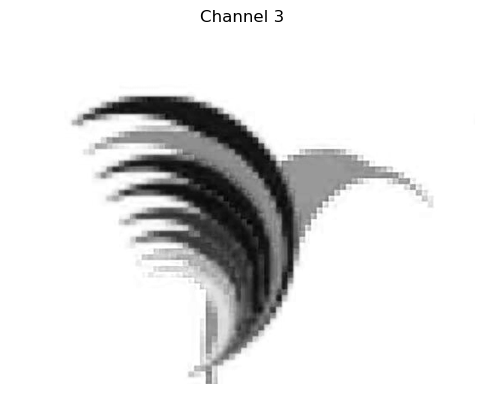

In [51]:
multi_band_image_path = r"C:\Users\HP\Downloads\raster image.tiff"
multi_band_image = np.array(Image.open(multi_band_image_path))

for i in range(multi_band_image.shape[2]):
    plt.figure(figsize=(6, 6))
    plt.imshow(multi_band_image[:, :, i], cmap='gray')  
    plt.title(f'Channel {i + 1}')
    plt.axis('off')
    plt.show()

In [52]:
def visualize_band_combination(band1, band2, band3):
    rgb_image = np.stack([multi_band_image[:, :, band1 - 1],
                         multi_band_image[:, :, band2 - 1],
                         multi_band_image[:, :, band3 - 1]], axis=-1)

    plt.imshow(rgb_image)
    plt.title(f"Band Combination: ({band1}, {band2}, {band3})")
    plt.axis("off")
    plt.show()

interact(visualize_band_combination, band1=(1, multi_band_image.shape[2], 1),
         band2=(1, multi_band_image.shape[2], 1),
         band3=(1, multi_band_image.shape[2], 1))

interactive(children=(IntSlider(value=2, description='band1', max=3, min=1), IntSlider(value=2, description='b…

<function __main__.visualize_band_combination(band1, band2, band3)>

In [53]:
!pip install geopandas matplotlib ipywidgets

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

gpd.io.file.fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'r'

shapefile_path = r"C:\Users\HP\Downloads\india_India_Country_Boundary"
gdf = gpd.read_file(shapefile_path)

def plot_attribute_chart(attribute_column):
    plt.figure(figsize=(10, 6))
    gdf[attribute_column].value_counts().plot(kind='bar')
    plt.title(f'Attribute Data Distribution - {attribute_column}')
    plt.xlabel(attribute_column)
    plt.ylabel('Count')
    plt.show()

attribute_columns = list(gdf.columns)

attribute_dropdown = Dropdown(options=attribute_columns, description='Select Attribute:')

def update_plot(attribute_column):
    plot_attribute_chart(attribute_column)

interact(update_plot, attribute_column=attribute_dropdown)

interactive(children=(Dropdown(description='Select Attribute:', options=('shapeiso', 'shape0', 'shapeid', 'sha…

<function __main__.update_plot(attribute_column)>

In [55]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


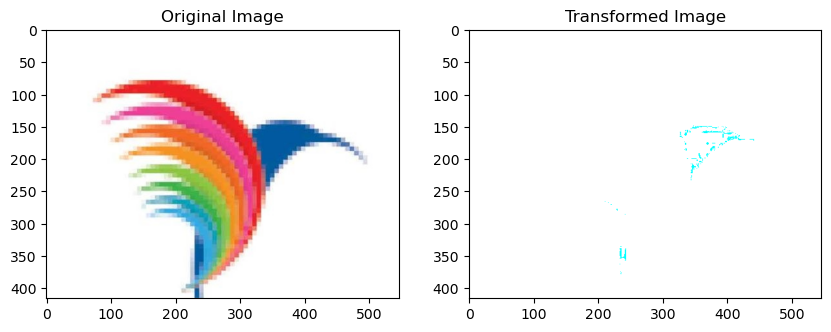

In [37]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

raster_image_path = r"C:\Users\HP\Downloads\raster image.tiff"
raster_image = np.array(Image.open(raster_image_path))

brightness_factor = 1.5
transformed_image = raster_image * brightness_factor

from scipy.ndimage import gaussian_filter
filtered_image = gaussian_filter(raster_image, sigma=1)

mean_value = np.mean(raster_image)
std_deviation = np.std(raster_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(raster_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

plt.show()
